In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from statistics import mean

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
airbnb_data = pd.read_csv("airbnb_data_single_house_apt.csv")
airbnb_data.head()

,price,review_scores_value,reviews_per_month,host_is_superhost,accommodates,bedrooms,bathrooms,beds,availability_365,review_scores_checkin,...,long_term,baby,children,family,check_in_24hrs,washer_dryer,air_con,heating,pets,lockbox
0,300,10.0,0.45,f,10,4.0,2.0,6.0,0,10.0,...,0,0,0,1,1,0,1,1,1,0
1,250,9.0,0.90,f,4,2.0,1.0,2.0,350,9.0,...,0,0,0,0,0,0,0,1,1,1
2,138,9.0,0.47,f,4,1.0,1.0,0.0,317,9.0,...,0,0,0,1,0,0,0,1,0,0
3,700,9.0,1.05,f,8,3.0,2.5,4.0,313,10.0,...,0,0,0,1,0,0,0,1,1,1
4,250,9.0,0.49,f,8,3.0,2.0,5.0,0,10.0,...,1,0,0,1,0,0,1,1,0,1


In [21]:
airbnb_data.columns

Index(['price', 'review_scores_value', 'reviews_per_month',
       'host_is_superhost', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
       'availability_365', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_value.1', 'property_type',
       'latitude', 'longitude', 'neighbourhood', 'dishwasher', 'yard', 'patio',
       'check_in_self', 'parking', 'pool', 'long_term', 'baby', 'children',
       'family', 'check_in_24hrs', 'washer_dryer', 'air_con', 'heating',
       'pets', 'lockbox'],
      dtype='object')

In [30]:
#replace nans with feature average
airbnb_data_fill = airbnb_data.fillna((airbnb_data.mean()))
airbnb_data_fill.head()

,price,review_scores_value,reviews_per_month,host_is_superhost,accommodates,bedrooms,bathrooms,beds,availability_365,review_scores_checkin,...,long_term,baby,children,family,check_in_24hrs,washer_dryer,air_con,heating,pets,lockbox
0,300,10.0,0.45,f,10,4.0,2.0,6.0,0,10.0,...,0,0,0,1,1,0,1,1,1,0
1,250,9.0,0.90,f,4,2.0,1.0,2.0,350,9.0,...,0,0,0,0,0,0,0,1,1,1
2,138,9.0,0.47,f,4,1.0,1.0,0.0,317,9.0,...,0,0,0,1,0,0,0,1,0,0
3,700,9.0,1.05,f,8,3.0,2.5,4.0,313,10.0,...,0,0,0,1,0,0,0,1,1,1
4,250,9.0,0.49,f,8,3.0,2.0,5.0,0,10.0,...,1,0,0,1,0,0,1,1,0,1


In [32]:
#drop non-numeric
airbnb_data_num = airbnb_data_fill.drop(columns = ["neighbourhood"])

In [33]:
airbnb_data_num.describe()

,price,review_scores_value,reviews_per_month,accommodates,bedrooms,bathrooms,beds,availability_365,review_scores_checkin,review_scores_cleanliness,...,long_term,baby,children,family,check_in_24hrs,washer_dryer,air_con,heating,pets,lockbox
count,24356.000000,24356.000000,24356.000000,24356.000000,24356.000000,24356.000000,24356.000000,24356.000000,24356.000000,24356.000000,...,24356.000000,24356.0,24356.0,24356.000000,24356.000000,24356.0,24356.000000,24356.000000,24356.000000,24356.000000
mean,297.530506,9.408749,1.921979,4.614961,1.690035,1.607942,2.366943,166.742897,9.760603,9.459050,...,0.369806,0.0,0.0,0.338726,0.108885,0.0,0.799844,0.918829,0.264411,0.184800
std,712.433192,0.809509,1.751282,2.864511,1.337621,1.095877,1.806781,133.913024,0.658513,0.844869,...,0.482762,0.0,0.0,0.473286,0.311501,0.0,0.400125,0.273103,0.441028,0.388144
min,0.000000,2.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,100.000000,9.000000,0.520000,2.000000,1.000000,1.000000,1.000000,37.000000,9.760603,9.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000
50%,150.000000,9.408749,1.920000,4.000000,1.000000,1.000000,2.000000,154.000000,10.000000,10.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000
75%,250.000000,10.000000,2.532500,6.000000,2.000000,2.000000,3.000000,308.000000,10.000000,10.000000,...,1.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.000000
max,22000.000000,10.000000,16.410000,24.000000,12.000000,16.000000,50.000000,365.000000,10.000000,10.000000,...,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [34]:
#draw correlations  between features and target feature, price
airbnb_data_num.corr()

,price,review_scores_value,reviews_per_month,accommodates,bedrooms,bathrooms,beds,availability_365,review_scores_checkin,review_scores_cleanliness,...,long_term,baby,children,family,check_in_24hrs,washer_dryer,air_con,heating,pets,lockbox
price,1.000000,-0.004021,-0.053774,0.382337,0.446923,0.604168,0.312806,0.108784,0.000912,0.012752,...,-0.034477,NaN,NaN,-0.009696,-0.033615,NaN,0.031696,-0.040526,0.029608,-0.071609
review_scores_value,-0.004021,1.000000,0.101519,-0.055938,-0.008065,-0.016012,-0.039603,-0.091896,0.574269,0.639447,...,0.011893,NaN,NaN,0.000847,0.022180,NaN,0.034273,0.062107,-0.007952,0.013547
reviews_per_month,-0.053774,0.101519,1.000000,-0.016699,-0.110584,-0.107158,-0.014516,0.010798,0.075641,0.122079,...,0.064511,NaN,NaN,-0.084307,-0.027993,NaN,0.063825,0.067705,-0.067462,0.082087
accommodates,0.382337,-0.055938,-0.016699,1.000000,0.796564,0.688853,0.794354,0.130709,-0.039189,-0.048732,...,0.056830,NaN,NaN,0.103231,-0.019827,NaN,0.092995,0.045598,0.042175,-0.058567
bedrooms,0.446923,-0.008065,-0.110584,0.796564,1.000000,0.806085,0.740644,0.089780,0.008862,-0.011781,...,0.037803,NaN,NaN,0.102662,-0.008601,NaN,0.072900,0.056577,0.039281,-0.064837
bathrooms,0.604168,-0.016012,-0.107158,0.688853,0.806085,1.000000,0.620123,0.105978,-0.007029,-0.008183,...,0.001659,NaN,NaN,0.044132,-0.031532,NaN,0.099173,0.035695,0.032152,-0.075423
beds,0.312806,-0.039603,-0.014516,0.794354,0.740644,0.620123,1.000000,0.099510,-0.022585,-0.034493,...,0.062850,NaN,NaN,0.107337,-0.013433,NaN,0.082692,0.054279,0.017897,-0.048705
availability_365,0.108784,-0.091896,0.010798,0.130709,0.089780,0.105978,0.099510,1.000000,-0.044149,-0.007918,...,0.162945,NaN,NaN,0.041022,0.055098,NaN,0.050045,0.051554,0.079089,-0.019579
review_scores_checkin,0.000912,0.574269,0.075641,-0.039189,0.008862,-0.007029,-0.022585,-0.044149,1.000000,0.500334,...,0.040189,NaN,NaN,0.039590,0.046754,NaN,-0.018900,0.044255,0.008613,0.038987
review_scores_cleanliness,0.012752,0.639447,0.122079,-0.048732,-0.011781,-0.008183,-0.034493,-0.007918,0.500334,1.000000,...,0.058408,NaN,NaN,0.006008,0.024177,NaN,0.036033,0.072439,-0.015902,0.018388


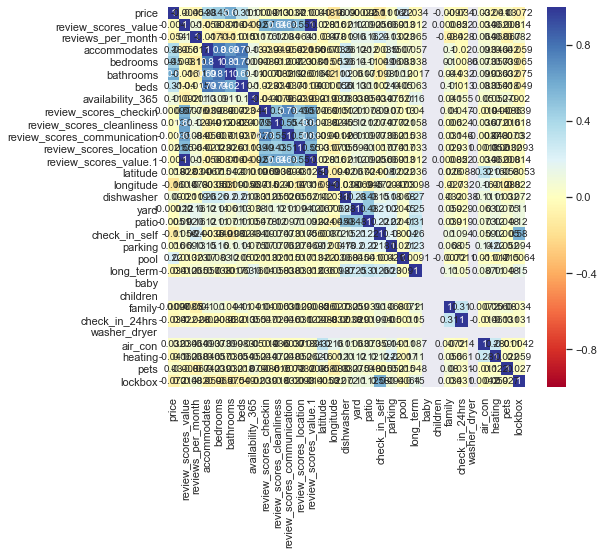

In [35]:
# correlation matrix heatmap between features and target feature
plt.figure(figsize = (8,7))
sns.heatmap(airbnb_data_num.corr(), cmap="RdYlBu", annot=True, vmin=-1, vmax=1);
plt.savefig("heatmap_blue_or.png", bbox_inches='tight')

In [36]:
#do a vanilla model of airbnb data, split into features and target matrices

X = airbnb_data_num.iloc[:, 1:]

y = airbnb_data_num.iloc[:, 0]

# perform train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(pd.get_dummies(X), y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X_train)

5

In [37]:
X.columns

Index(['review_scores_value', 'reviews_per_month', 'host_is_superhost',
       'accommodates', 'bedrooms', 'bathrooms', 'beds', 'availability_365',
       'review_scores_checkin', 'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value.1', 'property_type', 'latitude', 'longitude',
       'dishwasher', 'yard', 'patio', 'check_in_self', 'parking', 'pool',
       'long_term', 'baby', 'children', 'family', 'check_in_24hrs',
       'washer_dryer', 'air_con', 'heating', 'pets', 'lockbox'],
      dtype='object')

In [38]:
rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    lr_model = LinearRegression()
    lr_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    lr_preds = lr_model.predict(X_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,lr_preds))
    mae = metrics.mean_absolute_error(y_val,lr_preds)
    
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(val_score)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("r2 cv avg: ", mean(r2_list))
    

rmse cv avg:  3762421274.5826426
mae cv avg:  85245993.55495365
r2 cv avg:  -107946624211332.55


In [39]:
rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    dtr_model = DecisionTreeRegressor()
    dtr_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    val_score = dtr_model.score(X_val, y_val)
    lr_preds = dtr_model.predict(X_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,lr_preds))
    mae = metrics.mean_absolute_error(y_val,lr_preds)
    rmse_list.append(rmse)
    mae_list.append(mae)
    r2_list.append(val_score)
    
print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("r2 cv avg: ", mean(r2_list))
    

rmse cv avg:  629.4572087890181
mae cv avg:  168.2433385287161
r2 cv avg:  0.20834365645861158


In [40]:
X_train, X_test, y_train, y_test = train_test_split(pd.get_dummies(X), y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

In [41]:
X_train.head()

,review_scores_value,reviews_per_month,accommodates,bedrooms,bathrooms,beds,availability_365,review_scores_checkin,review_scores_cleanliness,review_scores_communication,...,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Tipi,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
19565,9.000000,1.540000,4,2.0,1.0,2.0,19,9.000000,10.00000,10.000000,...,0,0,0,0,0,0,0,0,0,0
18240,9.408749,1.921979,2,2.0,1.0,2.0,288,9.760603,9.45905,9.743547,...,0,0,0,0,0,0,0,0,0,0
8007,9.408749,1.921979,4,1.0,2.0,1.0,276,9.760603,9.45905,9.743547,...,0,0,0,0,0,0,0,0,0,0
11663,10.000000,1.760000,8,2.0,1.0,3.0,0,10.000000,10.00000,10.000000,...,0,0,0,0,0,0,0,0,0,0
11613,10.000000,0.100000,4,1.0,1.0,1.0,178,10.000000,10.00000,10.000000,...,0,0,0,0,0,0,0,0,0,0


In [42]:
#DTR Model 1, performs much better than Linear Regression

rmse_list = []
mae_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    dtr_model = DecisionTreeRegressor()
    dtr_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    val_score = dtr_model.score(X_val, y_val)
    dtr_preds = dtr_model.predict(X_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,dtr_preds))
    mae = metrics.mean_absolute_error(y_val, dtr_preds)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
 

rmse cv avg:  586.7653149334201
mae cv avg:  161.7107509646498


In [43]:
#DTR Model 2, hyperparameter tweak, performs slightly better than Linear Regression
rmse_list = []
mae_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    dtr_model = DecisionTreeRegressor(max_features="sqrt", max_leaf_nodes = 100)
    dtr_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    val_score = dtr_model.score(X_val, y_val)
    dtr_preds = dtr_model.predict(X_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,dtr_preds))
    mae = metrics.mean_absolute_error(y_val, dtr_preds)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))

rmse cv avg:  562.2493925356804
mae cv avg:  168.748409478463


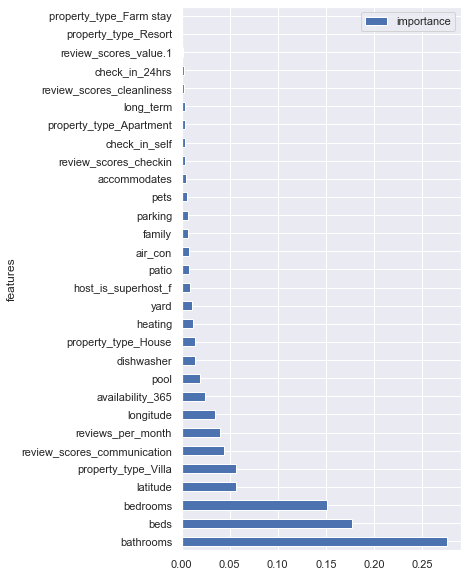

In [50]:
#see what features are most influential
col = X_tr.columns
imp = dtr_model.feature_importances_
importance_df["features"] = col
importance_df["importance"] = imp
importance_sorted_df = importance_df.sort_values(by='importance', ascending=False)
importance_sorted_df.head(30).plot.barh(x="features", figsize=(5,10))
plt.savefig("feature_importances.svg")



In [51]:
#Gradient Boost Regressor model, performs best
rmse_list = []
mae_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    gbr_model = GradientBoostingRegressor()
    gbr_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    val_score = gbr_model.score(X_val, y_val)
    gbr_preds = gbr_model.predict(X_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,gbr_preds))
    mae = metrics.mean_absolute_error(y_val, gbr_preds)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))

rmse cv avg:  438.35335533978855
mae cv avg:  128.31999317731976


In [52]:
rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    dtr_model = DecisionTreeRegressor(max_features="sqrt", max_leaf_nodes = 100)
    dtr_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    dtr_preds = dtr_model.predict(X_val)
    
    val_score = dtr_model.score(X_val, y_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,dtr_preds))
    mae = metrics.mean_absolute_error(y_val, dtr_preds)
    
    r2_list.append(val_score)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("val cv avg: ", mean(r2_list))

rmse cv avg:  564.4898643230102
mae cv avg:  171.76548073996574
val cv avg:  0.3221883195985195


In [53]:
#XGB Regressor, performs best but similar to gradient boosting regressor

rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    xgb_preds = xgb_model.predict(X_val)
    
    val_score = xgb_model.score(X_val, y_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,xgb_preds))
    mae = metrics.mean_absolute_error(y_val, xgb_preds)
    
    r2_list.append(val_score)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("val cv avg: ", mean(r2_list))

[10:56:54] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:57:00] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:57:05] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:57:10] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:57:15] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse cv avg:  428.38435063980893
mae cv avg:  127.7276856440714
val cv avg:  0.6141614592847898


In [ ]:
#I'm looking for ways to improve my model.  

In [ ]:
#feature engineering?  maybe i will save this for later.  I think I need a higher quality target.
airbnb_data_num[["parking"*"long_term"*"check_in_self"*"review_scores_value", "pool"*"beds"*"bedrooms", "accomodates"*"availability_365", "latitude"*"longitude", "bathrooms"**2, "review_scores_communication", "property_type"]]
feature_eng_df = pd.DataFrame()
feature_eng_df["price"] = airbnb_data_num["price"]
feature_eng_df["pool"] = airbnb_data_num["pool"]
feature_eng_df["review_scores_communication"] = airbnb_data_num["review_scores_communication"]
feature_eng_df["property_type"] = airbnb_data_num["property_type"]
feature_eng_df["tertiary"] = airbnb_data_num["parking"]*airbnb_data_num["long_term"]*airbnb_data_num["review_scores_value"]
feature_eng_df["max_guests"] = airbnb_data_num["beds"]*airbnb_data_num["bedrooms"]*airbnb_data_num["accommodates"]*airbnb_data_num["availability_365"]
feature_eng_df["location"] = airbnb_data_num["latitude"]*airbnb_data_num["longitude"]
feature_eng_df["bathrooms"] = airbnb_data_num["bathrooms"]**2

### Select only superhosts

In [76]:
#get pandas and sql to work together
import psycopg2 as pg
import pandas.io.sql as pd_sql

from psycopg2 import connect
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT

params = {
    'host': 'localhost',  #connect to _local_ version of psql
    'user': 'agar',
    'dbname': 'properties',    # DB connecting to
    'port': 5432          # port
}

# connect with unpacked params
connection = pg.connect(**params)

#select airbnb data with only superhost status to ensure quality of target
query_airbnb_edited = """
select cast(regexp_replace(price, '\$|\.00|,', '','g') as int) as price, al.reviews_per_month, 
al.accommodates, al.bedrooms, al.bathrooms, al.beds, al.availability_365, 
al.review_scores_checkin, al.review_scores_cleanliness, al.review_scores_communication, 
al.review_scores_location, al.review_scores_value, al.property_type, al."latitude", al."longitude", 
regexp_replace(al."neighbourhood", '\ |\-|\/,', '_','g') as "neighborhood",

(case when al.amenities like '%Dishwasher%' then 1 else 0 end) as "dishwasher",
(case when al.amenities like '%Garden or backyard%' then 1 else 0 end) as "yard",
(case when al.amenities like '%Patio or balcony%' then 1 else 0 end) as "patio",
(case when al.amenities like '%Self check-in%' then 1 else 0 end) as "check_in_self",
(case when al.amenities like '%parking%' then 1 else 0 end) as "parking",
(case when al.amenities like '%pool%' then 1 else 0 end) as "pool",
(case when al.amenities like '%Long term%' then 1 else 0 end) as "long_term",
(case when al.amenities like '%Baby%' then 1 else 0 end) as "baby",
(case when al.amenities like '%Child%' then 1 else 0 end) as "children",
(case when al.amenities like '%Family%' then 1 else 0 end) as "family",
(case when al.amenities like '%24-hour%' then 1 else 0 end) as "check_in_24hrs",

(case when al.amenities like '%Washer%' then 1 else 0 end) as "washer_dryer",
(case when al.amenities like '%Air conditioning%' then 1 else 0 end) as "air_con",
(case when al.amenities like '%Heating%' then 1 else 0 end) as "heating",
(case when al.amenities like '%Pets%' then 1 else 0 end) as "pets",
(case when al.amenities like '%Lockbox%' then 1 else 0 end) as "lockbox"

from airbnb_full_listings al
where room_type = 'Entire home/apt' and al.host_is_superhost = 't' and cast(regexp_replace(price, '\$|\.00|,', '','g') as int)<1000 and cast(regexp_replace(price, '\$|\.00|,', '','g') as int)>20
"""
airbnb_df = pd.read_sql_query(query_airbnb_edited , connection, index_col=None,\
                              coerce_float=True, params=None, parse_dates=None, chunksize=None)

airbnb_df.describe()

,price,review_scores_value,reviews_per_month,accommodates,bedrooms,bathrooms,beds,availability_365,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,dishwasher,yard,patio,check_in_self,parking,pool,long_term,baby,children,family,check_in_24hrs,washer_dryer,air_con,heating,pets,lockbox
count,8232.000000,7578.000000,7593.000000,8232.000000,8230.000000,8231.000000,8221.000000,8232.000000,7579.000000,7580.000000,7580.000000,7579.000000,7578.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000
mean,190.893950,9.699525,2.689586,4.306608,1.532564,1.431114,2.225398,178.203960,9.943264,9.802375,9.946834,9.876237,9.699525,34.042029,-118.337065,0.420311,0.440476,0.534257,0.576652,0.944485,0.008382,0.465865,0.060253,0.107264,0.340258,0.135204,0.736880,0.815112,0.959791,0.274417,0.234086
std,143.198831,0.553918,2.166866,2.644307,1.188553,0.769674,1.649719,121.309799,0.320745,0.493253,0.319894,0.378547,0.553918,0.134402,0.155006,0.493639,0.496474,0.498855,0.494120,0.228997,0.091174,0.498864,0.237969,0.309468,0.473824,0.341962,0.440353,0.388230,0.196461,0.446247,0.423452
min,24.000000,2.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,33.338830,-118.934220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.000000,9.000000,0.950000,2.000000,1.000000,1.000000,1.000000,67.000000,10.000000,10.000000,10.000000,10.000000,9.000000,33.996700,-118.447188,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,146.000000,10.000000,2.250000,4.000000,1.000000,1.000000,2.000000,164.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.060980,-118.352800,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,225.000000,10.000000,3.940000,6.000000,2.000000,2.000000,3.000000,300.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.110445,-118.254607,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,999.000000,10.000000,16.410000,24.000000,10.000000,10.000000,19.000000,365.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.684070,-117.654180,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 


In [115]:
#test model with higher quality target - only superhosts - performs much better
X = airbnb_df.iloc[:, 1:]

y = airbnb_df.iloc[:, 0]

#perform train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(pd.get_dummies(X), y, test_size=0.2, random_state=42)

#perform cross-val split - 5 folds
kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X_train)

rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    xgb_preds = xgb_model.predict(X_val)
    
    val_score = xgb_model.score(X_val, y_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,xgb_preds))
    mae = metrics.mean_absolute_error(y_val, xgb_preds)
    
    r2_list.append(val_score)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("val cv avg: ", mean(r2_list))

[11:15:06] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:15:12] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:15:17] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:15:27] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:15:34] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse cv avg:  85.68865129816588
mae cv avg:  52.339346556203694
val cv avg:  0.6477783397534959


### EDA - Correlation Matrix Heatmap

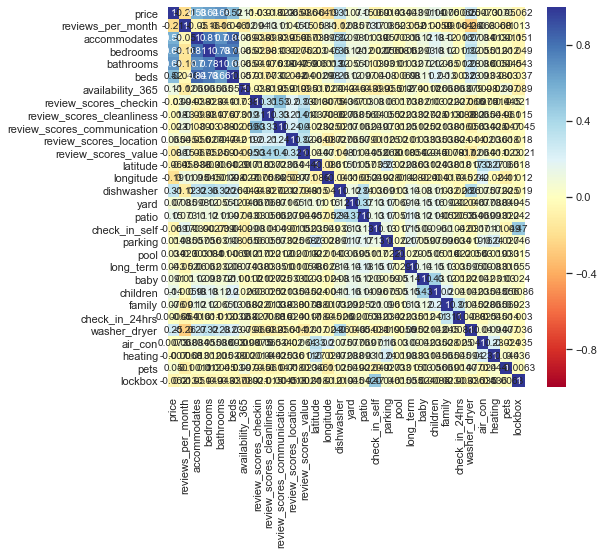

In [116]:
# correlation matrix heatmap 
plt.figure(figsize = (8,7))
sns.heatmap(airbnb_df.corr(), cmap="RdYlBu", annot=True, vmin=-1, vmax=1);
plt.savefig("heatmap_blue_or.png", bbox_inches='tight')


In [117]:
airbnb_df.columns

Index(['price', 'reviews_per_month', 'accommodates', 'bedrooms', 'bathrooms',
       'beds', 'availability_365', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'property_type',
       'latitude', 'longitude', 'neighborhood', 'dishwasher', 'yard', 'patio',
       'check_in_self', 'parking', 'pool', 'long_term', 'baby', 'children',
       'family', 'check_in_24hrs', 'washer_dryer', 'air_con', 'heating',
       'pets', 'lockbox'],
      dtype='object')

### Feature Engineering

In [122]:
#Accomodation Density - how many people accomodates vs space available
airbnb_df["accomodation_density"] = \
(airbnb_df['accommodates']/(airbnb_df['bedrooms']*airbnb_df['beds'])) + \
(airbnb_df['accommodates']/(airbnb_df['bathrooms']))

# model

X = airbnb_df.iloc[:, 1:]

y = airbnb_df.iloc[:, 0]

# perform train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(pd.get_dummies(X), y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X_train)

rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    xgb_preds = xgb_model.predict(X_val)
    
    val_score = xgb_model.score(X_val, y_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,xgb_preds))
    mae = metrics.mean_absolute_error(y_val, xgb_preds)
    
    r2_list.append(val_score)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("val cv avg: ", mean(r2_list))


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:28:53] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:28:59] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:29:04] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:29:09] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:29:14] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse cv avg:  85.58804635201786
mae cv avg:  52.36707389964782
val cv avg:  0.6485878283299588


In [124]:
# Feature Engineer properties that acoomodate families
airbnb_df["family_factor"] = \
(airbnb_df['family']+airbnb_df['children'] + airbnb_df['baby']) * \
(airbnb_df['yard']+airbnb_df['patio'] + airbnb_df['pool'] + airbnb_df['dishwasher'] + airbnb_df['washer_dryer'] + airbnb_df['parking']) 

X = airbnb_df.iloc[:, 1:]

y = airbnb_df.iloc[:, 0]

# perform train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(pd.get_dummies(X), y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X_train)

rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    xgb_preds = xgb_model.predict(X_val)
    
    val_score = xgb_model.score(X_val, y_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,xgb_preds))
    mae = metrics.mean_absolute_error(y_val, xgb_preds)
    
    r2_list.append(val_score)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("val cv avg: ", mean(r2_list))


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:33:36] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:33:41] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:33:46] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:33:52] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:33:57] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse cv avg:  85.65510785882964
mae cv avg:  52.35479260490261
val cv avg:  0.6479476994735373


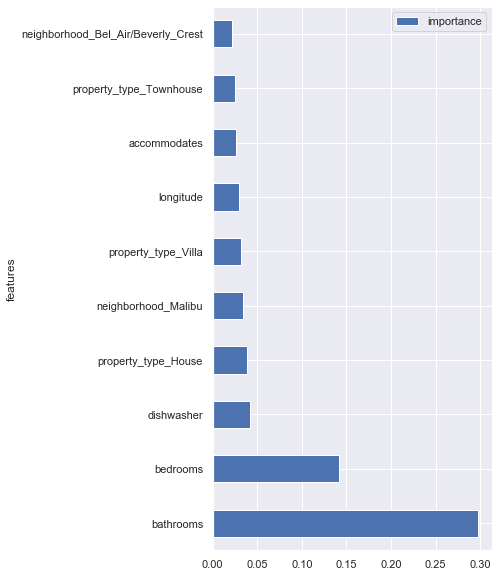

In [128]:
#look at feature importances for further feature engineering

col = X_tr.columns
imp = xgb_model.feature_importances_
importance_df = pd.DataFrame()
importance_df["features"] = col
importance_df["importance"] = imp
importance_sorted_df = importance_df.sort_values(by='importance', ascending=False)
importance_sorted_df.head(10).plot.barh(x="features", figsize=(5,10))
plt.savefig("feature_importances_xgb_10.svg")

In [130]:
#feature engineering - add this feature to compare baths to bedrooms
airbnb_df["baths_to_bedrooms"] = airbnb_df['bathrooms']/airbnb_df['bedrooms']

#model
X = airbnb_df.iloc[:, 1:]

y = airbnb_df.iloc[:, 0]

# perform train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(pd.get_dummies(X), y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X_train)

rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    xgb_preds = xgb_model.predict(X_val)
    
    val_score = xgb_model.score(X_val, y_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,xgb_preds))
    mae = metrics.mean_absolute_error(y_val, xgb_preds)
    
    r2_list.append(val_score)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("val cv avg: ", mean(r2_list))


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:44:14] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:44:19] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:44:24] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:44:29] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:44:34] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse cv avg:  85.58904268097022
mae cv avg:  52.25161396104817
val cv avg:  0.6484134847955147


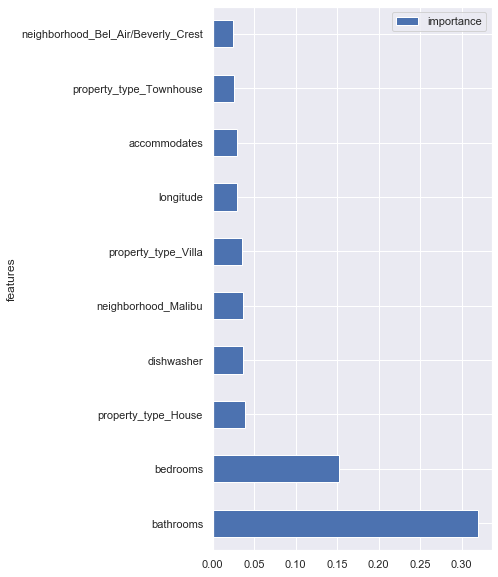

In [131]:
#look at feature importance to see any changes

col = X_tr.columns
imp = xgb_model.feature_importances_
importance_df = pd.DataFrame()
importance_df["features"] = col
importance_df["importance"] = imp
importance_sorted_df = importance_df.sort_values(by='importance', ascending=False)
importance_sorted_df.head(10).plot.barh(x="features", figsize=(5,10))
plt.savefig("feature_importances_xgb_10.svg")

In [138]:
#feature engineering - boost properties with strongest features

airbnb_df["super_strong"] = airbnb_df['bathrooms']*airbnb_df['bedrooms']+airbnb_df['dishwasher']

X = airbnb_df.iloc[:, 1:]

y = airbnb_df.iloc[:, 0]

# perform train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(pd.get_dummies(X), y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X_train)

rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    xgb_preds = xgb_model.predict(X_val)
    
    val_score = xgb_model.score(X_val, y_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,xgb_preds))
    mae = metrics.mean_absolute_error(y_val, xgb_preds)
    
    r2_list.append(val_score)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("val cv avg: ", mean(r2_list))


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:51:09] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:51:15] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:51:20] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:51:25] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[11:51:30] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse cv avg:  85.67809227662912
mae cv avg:  52.17585951820321
val cv avg:  0.6478188849889186


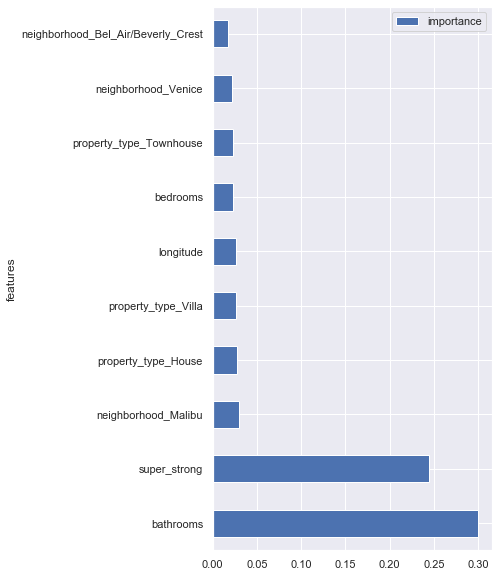

In [139]:
#look at feature importances - super strong is doing well

col = X_tr.columns
imp = xgb_model.feature_importances_
importance_df = pd.DataFrame()
importance_df["features"] = col
importance_df["importance"] = imp
importance_sorted_df = importance_df.sort_values(by='importance', ascending=False)
importance_sorted_df.head(10).plot.barh(x="features", figsize=(5,10))
plt.savefig("feature_importances_xgb_10.svg")

In [143]:
#look at the data quality - how to increase target quality?
airbnb_df.describe()

,price,reviews_per_month,accommodates,bedrooms,bathrooms,beds,availability_365,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,dishwasher,yard,patio,check_in_self,parking,pool,long_term,baby,children,family,check_in_24hrs,washer_dryer,air_con,heating,pets,lockbox,accomodation_density,family_factor,baths_to_bedrooms,super_strong
count,8232.000000,7593.000000,8232.000000,8230.000000,8231.000000,8221.000000,8232.000000,7579.000000,7580.000000,7580.000000,7579.000000,7578.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8232.000000,8218.000000,8232.000000,8222.0,8229.000000
mean,190.893950,2.689586,4.306608,1.532564,1.431114,2.225398,178.203960,9.943264,9.802375,9.946834,9.876237,9.699525,34.042029,-118.337065,0.420311,0.440476,0.534257,0.576652,0.944485,0.008382,0.465865,0.060253,0.107264,0.340258,0.135204,0.736880,0.815112,0.959791,0.274417,0.234086,inf,1.751215,inf,3.328290
std,143.198831,2.166866,2.644307,1.188553,0.769674,1.649719,121.309799,0.320745,0.493253,0.319894,0.378547,0.553918,0.134402,0.155006,0.493639,0.496474,0.498855,0.494120,0.228997,0.091174,0.498864,0.237969,0.309468,0.473824,0.341962,0.440353,0.388230,0.196461,0.446247,0.423452,NaN,2.853710,NaN,4.637227
min,24.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,33.338830,-118.934220,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.916667,0.000000,0.0,0.000000
25%,100.000000,0.950000,2.000000,1.000000,1.000000,1.000000,67.000000,10.000000,10.000000,10.000000,10.000000,9.000000,33.996700,-118.447188,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.8,1.000000
50%,146.000000,2.250000,4.000000,1.000000,1.000000,2.000000,164.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.060980,-118.352800,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.666667,0.000000,1.0,2.000000
75%,225.000000,3.940000,6.000000,2.000000,2.000000,3.000000,300.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.110445,-118.254607,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,7.500000,3.000000,1.0,5.000000
max,999.000000,16.410000,24.000000,10.000000,10.000000,19.000000,365.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.684070,-117.654180,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,18.000000,inf,101.000000


In [141]:
###Check if we restrict examples to guesthouse type, if model improves - model does improve drastically, 
###however the r-squared value does go down quite a bit.  Not sure if this deal iw worthwhile

mask = airbnb_df['property_type'] == "Guesthouse"
airbnb_guesthouse = airbnb_df[mask]
airbnb_guesthouse = airbnb_guesthouse.drop(columns = ['property_type'])

X = airbnb_guesthouse.iloc[:, 1:]

y = airbnb_guesthouse.iloc[:, 0]

# perform train/test split
X_train, X_test, y_train, y_test = \
    train_test_split(pd.get_dummies(X), y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
kf.get_n_splits(X_train)

rmse_list = []
mae_list = []
r2_list = []

for train_ind, val_ind in kf.split(X_train):
    
    #assign train and validate sets
    X_tr, y_tr = X_train.iloc[train_ind], y_train.iloc[train_ind]
    X_val, y_val = X_train.iloc[val_ind], y_train.iloc[val_ind]
    
    #fit model
    xgb_model = xgb.XGBRegressor()
    xgb_model.fit(X_tr, y_tr)
    
    # score fit model on validation data
    xgb_preds = xgb_model.predict(X_val)
    
    val_score = xgb_model.score(X_val, y_val)
    rmse = np.sqrt(metrics.mean_squared_error(y_val,xgb_preds))
    mae = metrics.mean_absolute_error(y_val, xgb_preds)
    
    r2_list.append(val_score)
    rmse_list.append(rmse)
    mae_list.append(mae)

print("rmse cv avg: ", mean(rmse_list))
print("mae cv avg: ", mean(mae_list))
print("val cv avg: ", mean(r2_list))

/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:22] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:23] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:24] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:24] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/agar/opt/anaconda3/envs/metis/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:25] WARNING: /usr/local/miniconda/conda-bld/xgboost_1572315027083/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
rmse cv avg:  46.11354683910637
mae cv avg:  30.193248608291952
val cv avg:  0.2978513487798451


In [142]:
airbnb_guesthouse.describe()

,price,reviews_per_month,accommodates,bedrooms,bathrooms,beds,availability_365,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_value,latitude,longitude,dishwasher,yard,patio,check_in_self,parking,pool,long_term,baby,children,family,check_in_24hrs,washer_dryer,air_con,heating,pets,lockbox,accomodation_density,family_factor,baths_to_bedrooms,super_strong
count,1217.000000,1204.000000,1217.000000,1216.000000,1217.000000,1217.000000,1217.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1216.0,1217.000000,1214.000000,1216.000000
mean,123.419885,3.499676,2.876746,0.725329,1.031224,1.510271,164.365653,9.993328,9.901585,9.989158,9.932444,9.844871,34.065909,-118.344958,0.165160,0.664749,0.570255,0.642564,0.978636,0.019721,0.477403,0.076417,0.121611,0.341824,0.159408,0.430567,0.870994,0.964667,0.276910,0.239113,inf,1.613804,inf,0.948191
std,55.533244,2.287610,1.267480,0.630017,0.177504,0.900531,116.767729,0.081445,0.303550,0.144050,0.260870,0.377968,0.115376,0.143238,0.371478,0.472272,0.495243,0.479442,0.144654,0.139096,0.499694,0.265774,0.326970,0.474516,0.366207,0.495359,0.335344,0.184695,0.447656,0.426717,NaN,2.595303,NaN,0.983709
min,40.000000,0.070000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,8.000000,6.000000,8.000000,6.000000,33.715320,-118.828430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.333333,0.000000
25%,90.000000,1.760000,2.000000,0.000000,1.000000,1.000000,62.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.002630,-118.438950,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.0,0.000000,1.000000,0.000000
50%,110.000000,3.140000,2.000000,1.000000,1.000000,1.000000,143.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.081580,-118.362980,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.0,0.000000,1.000000,1.000000
75%,140.000000,4.712500,4.000000,1.000000,1.000000,2.000000,279.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.146190,-118.264810,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf,3.000000,inf,1.000000
max,595.000000,14.520000,16.000000,3.000000,3.000000,9.000000,365.000000,10.000000,10.000000,10.000000,10.000000,10.000000,34.684070,-117.724690,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf,15.000000,inf,10.000000
